<a href="https://colab.research.google.com/github/Alex-Hunterz/Environmental-Intelligence/blob/main/geospatial/samples/v3/climate_change_tidal_surge/predict_sea_level_rise_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting sea level rise risk

<b>Table of Contents</b>

- Overview
    - Note
- Setup
    - Get Authentication Token
- Make Query
    - Utility funtions to display the tiff files
    - Display the tiff files
- Understanding the output
- Displaying the tiff files on the map

## Overview

As the following notebook will demonstrate, IBM Environmental Intelligence: Geospatial APIs can be used to determine regions under the threat of the affects of rising sea levels due to climate change.

We will use <i>Shuttle Radar Topography Mission (SRTM)</i>, a Digital Elevation Model (DEM) for this use case. SRTM is a DEM that is utilised for research in fields including, but not limited to: geology, geomorphology, water resources and hydrology, glaciology, evaluation of natural hazards and vegetation surveys.


---
**Note**

SRTM, JAXA, and GMTED are all digital elevation models (DEMs) that can be utilized for various applications. Each DEM has different error margins and resolutions. For this specific use case, we selected the SRTM DEM.

---

## Setup
Before starting, you have to install IBM EI Geospatial python SDK i.e ibmpairs and other modules needed to run this sample ,mentioned in the below cell.

<b>Note:</b> To run this notebook seamlessly, you have to first configure your Geospatial APIs' credentials in a file named `secrets.ini` in the below format:

```
[EI]
api.api_key = <Your Geospatial APIs API key>
api.tenant_id = <Your Geospatial APIs Tenant ID>
api.org_id = <Your Geospatial APIs Org ID>
```

Keep the secrets.ini file at an appropriate relative location of this notebook. For example, as specified in the below config.

```config.read('../../../auth/secrets.ini')```

In [1]:
%pip install ibmpairs
%pip install rasterio
%pip install folium
%pip install configparser
%pip install matplotlib

Let's start with some necessary imports

In [2]:
import os, pandas as pd, numpy as np
from matplotlib import pyplot as plt
from ibmpairs import query, client
import ibmpairs.client as client
import ibmpairs.query as query
import json
import rasterio
import configparser
from IPython.display import display as display_summary
from IPython import display
import folium
import branca.colormap as cm
from matplotlib import colors as colors

### Get Authentication Token

Now, let's create a client object using the API_KEY, TENANT_ID (or CLIENT_ID) and ORG_ID to create an authenticated HTTP client Authentication token using 'ibmpairs.client' module, to use it in the subsequent steps.

In [3]:
config = configparser.RawConfigParser()
config.read("/content/secrets.ini")

EI_API_KEY    = config.get("EI", "api.api_key")
EI_TENANT_ID  = config.get("EI", "api.tenant_id")
EI_ORG_ID     = config.get("EI", "api.org_id")

EI_client_v3  = client.get_client(api_key   = EI_API_KEY,
                                    tenant_id = EI_TENANT_ID,
                                    org_id    = EI_ORG_ID,
                                    version   = 3
                                   )

2025-03-06 09:42:25 - paw - INFO - The client authentication method is assumed to be OAuth2.
2025-03-06 09:42:25 - paw - INFO - Legacy Environment is False
2025-03-06 09:42:25 - paw - INFO - The authentication api key type is assumed to be IBM EIS, because the api key prefix 'PHX' is present.
2025-03-06 09:42:26 - paw - INFO - Authentication success.
2025-03-06 09:42:26 - paw - INFO - HOST: https://api.ibm.com/geospatial/run/na/core/v3


## Make Query

The following code submits a query that selects all pixels in the New York area that have elevations above sea level ("filter": {"operator": "GT", "value": "0"}). The query covers the entire time period from January 1, 2024 to January 1, 2024. And waits for it to finish, downloads the data to the download folder, loads the data to memory and displays it on screen. This could take a few minutes to complete as all the data is brought together.

Let's go ahead, define and submit a query.

In [20]:
import ibmpairs
from ibmpairs import catalog
search_by_word = catalog.search("Precipitation")
search_by_word

dataset_id data_layer_id                          data_layer_name  \
0         466         50683                      Minimum temperature   
1         466         50684                      Maximum temperature   
2         466         50685                      Average temperature   
3         466         50686                      Total precipitation   
4         466         51219                          Model Elevation   
5         466         50683                      Minimum temperature   
6         466         50684                      Maximum temperature   
7         466         50685                      Average temperature   
8         466         50686                      Total precipitation   
9         466         51219                          Model Elevation   
0         330         50203                    Average precipitation   
1         466         50686                      Total precipitation   
2         524         51198   Precipitation Daily Climo 1991 to 2020   
3        1020         49556                            Precipitation   
4           9            91                      Daily precipitation   
5          16         16700                    Average precipitation   
6         122         49187                            Precipitation   
7         190         49432               Minimum precipitation rate   
8         190         49433               Maximum precipitation rate   
9         190         49435                       Precipitation type   
10        190         49459                      Total precipitation   
11        466         50686                      Total precipitation   
12         44         44249                          Precip past 1 h   
13          9            91                      Daily precipitation   
14         44         44862                               Precip 2 d   
15         16         16700                    Average precipitation   
16         44         44250                         Precip past 24 h   
17         44         44251                          Precip past 6 h   
18         44         44314  Driving Difficulty on scale of 0 to 100   
19         44         44863                               Precip 3 d   
20         44         44865                               Precip MTD   
21         44         44866                               Precip YTD   
22         44         44870                                 Snow MTD   
23        122         49187                            Precipitation   
24        157         49249                          Precip past 1 h   
25        157         49250                         Precip past 24 h   
26        157         49251                          Precip past 6 h   
27        157         49314  Driving Difficulty on scale of 0 to 100   
28        565         56500                      EC-Earth3 ssp126 pr   
29        565         56513                  EC-Earth3 historical pr   
30        565         56524                      EC-Earth3 ssp585 pr   
31          9            91                      Daily precipitation   
32         16         16700                    Average precipitation   
33         44         44250                         Precip past 24 h   
34         44         44251                          Precip past 6 h   
35        157         49250                         Precip past 24 h   
36        157         49251                          Precip past 6 h   
37        190         49432               Minimum precipitation rate   
38        190         49433               Maximum precipitation rate   
39        190         49435                       Precipitation type   
40        190         49459                      Total precipitation   

                                                                                                                                                          data_layer_description_short  \
0         2m temperature (daily minimum) from IBMs Calibrated Seasonal P

In [19]:
# Sea level rise and tempest risks using a GSA Filter predicate in the query : https://www.climate.gov/news-features/understanding-climate/climate-change-global-sea-level
# Every location between 0m and 10m  is at risks for the next 50 years (high tides, sealevel rise, & storms). EPCCC said that  sea will rise by at least x meters up  to y meters depending of scenario by 2100

# NY_Sea_rise_risk_query_object = query.submit_check_status_and_download ({
#   "name" : "NY area at risk of sea rise level",
#   "layers": [
#            { "type": "raster",
#               "id": "49506",  # SRTM DEM datalayer   30m resolution with error margin ...
#               "temporal": {"intervals": [{"snapshot": "2024-01-01T00:00:00Z"}]}, "output": True,
#               "filter": {"operator": "GT", "value": "0"}},   # Where elevation is higher than sea level (i.e. 0 )
#           ],
#   # the Area of interest
#  "spatial": {"type": "square", "coordinates": [18.8920, 72.7156,19.3601, 72.9312]},  # NY area
#   # The dates
#  "temporal": {"intervals": [{"snapshot": "2024-01-01T00:00:00Z"}]}
# }, client= EI_client_v3)


NY_Sea_rise_risk_query_object = query.submit_check_status_and_download({
  "name": "NY Coastal Risk with Multiple Layers",
  "layers": [
    {
      "type": "raster",
      "id": "49506",  # Elevation (SRTM DEM)
      "temporal": {"intervals": [{"snapshot": "2024-01-01T00:00:00Z"}]},
      "filter": {
        "conditions": [
            {"operator": "GE", "value": 0},
            {"operator": "LE", "value": 10}
        ]
      },
      "output": True
    },
    {
      "type": "raster",
      "id": "50686",  # Wind Speed (MERRA-2) - Replace with the actual ID if different
      "temporal": {"intervals": [{"snapshot": "2024-01-01T00:00:00Z"}]},
      "output": True
    },
    {
      "type": "raster",
      "id": "49459",  # Precipitation (MERRA-2) - Replace with the actual ID if different
      "temporal": {"intervals": [{"snapshot": "2024-01-01T00:00:00Z"}]},
      "output": True
    }
  ],
  "spatial": {
    "type": "square",
    "coordinates": [40.65015, -74.21323, 40.83345, -73.95059]
  },
  "temporal": {
    "intervals": [{"snapshot": "2024-01-01T00:00:00Z"}]
  }
}, client=EI_client_v3)

2025-03-06 10:08:56 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2025-03-06 10:08:56 - paw - ERROR - The POST request call to https://api.ibm.com/geospatial/run/na/core/v3/query failed with status code: 422, message: D114:The query area height is less than the resolution for one of the query layers; .


Exception in thread Thread-27:
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.11/dist-packages/ibmpairs/common.py", line 368, in run
    self.result = asyncio.run(self.func(*self.args, **self.kwargs))
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 190, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/base_events.py", line 654, in run_until_complete
    return future.result()
           ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ibmpairs/query.py", line 7382, in async_submit_check_status_and_download
    await self.async_submit(query       = query, 
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^

2025-03-06 10:08:56 - paw - INFO - TASK: submit_check_status_and_download COMPLETED.


### Utility funtions to display the tiff files

Let's define some utility functions to plot the downloaded raster tiff(s) and the summary file(s).

In [11]:
pd.set_option('display.max_colwidth', None)

def get_extent(f):
    with open(f, "r") as ff:
        stats = json.load(ff)
    boundingBox=stats["boundingBox"]
    myextent = [boundingBox["minLongitude"],boundingBox["maxLongitude"],boundingBox["minLatitude"],boundingBox["maxLatitude" ] ]
    return myextent

def display_raster(raster_file_name, colorMap, title = None, Max=None, Min=None, myextent=None,savepng=False):
    if  raster_file_name.endswith(".tiff"):
        with rasterio.open(raster_file_name) as raster_file:
            if not myextent:
                myextent=get_extent(raster_file_name+".json")
            data = raster_file.read(1)
            fig=plt.figure(figsize = (20, 12))
            if Max is None:
                Max=data.max()
            if Min is None:
                Min = data.min()
            plt.imshow(data, cmap = colorMap, vmin = Min, vmax = Max,extent = myextent)
            if not title:
                title=os.path.basename(raster_file_name)
            plt.title(title)
            plt.colorbar()
            plt.show()
            if savepng:
                plt.axis('off')
                fig.savefig(raster_file_name.replace(".tiff",".jpg"), bbox_inches='tight', pad_inches=0)

### Display the tiff files

Let's display the resulting raster tiff file(s) and the summary file(s) using the above methods.

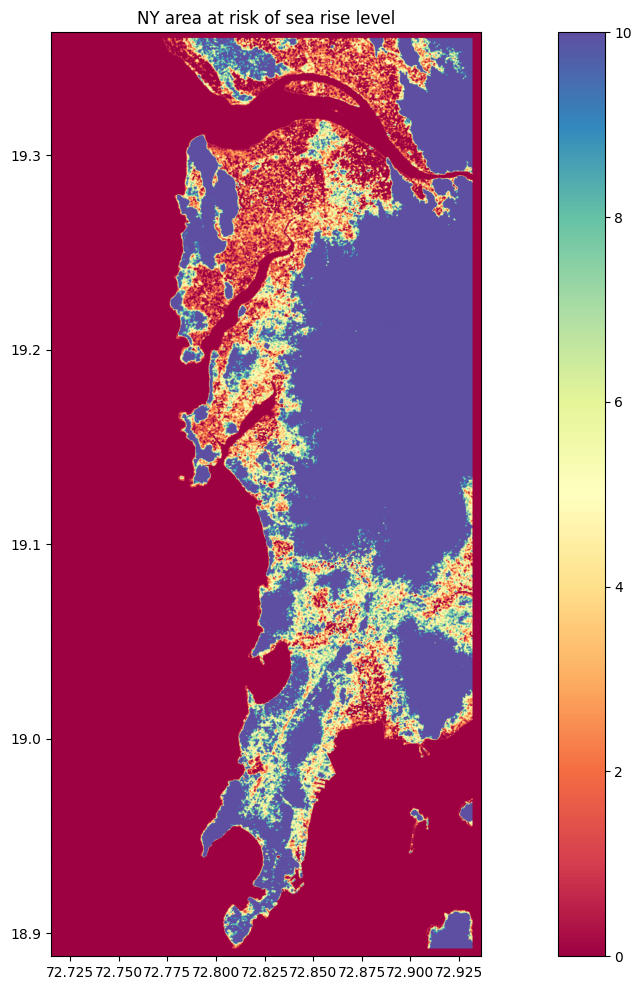

In [12]:
result_rasterfiles_list = NY_Sea_rise_risk_query_object.list_files()
for NY_risk_file in result_rasterfiles_list:
    display_raster(NY_risk_file, 'Spectral', title="NY area at risk of sea rise level", Min=0, Max=10)


## Understanding the output

As we can see in the above raster tiff file that's plotted, entire New York area is being displayed and there are a couple of colors in different parts of the raster tiff Yellow, Red and Blue which indicate high, moderate and low risk respectively. The above file indicates the degree of risk associated with the area being displayed. The values specifically range from 0 to 10, with 0 indicating  most risk as you are closer to the sea level, and 10 indicating less risk as you are above or equal to 10 m  elevation.

## Displaying the tiff files on the map

Below is the code snippet to overlay the above tiff on a world map to get an interactive visual display, after which we display the corresponding screenshot for ease of rendering the notebook.


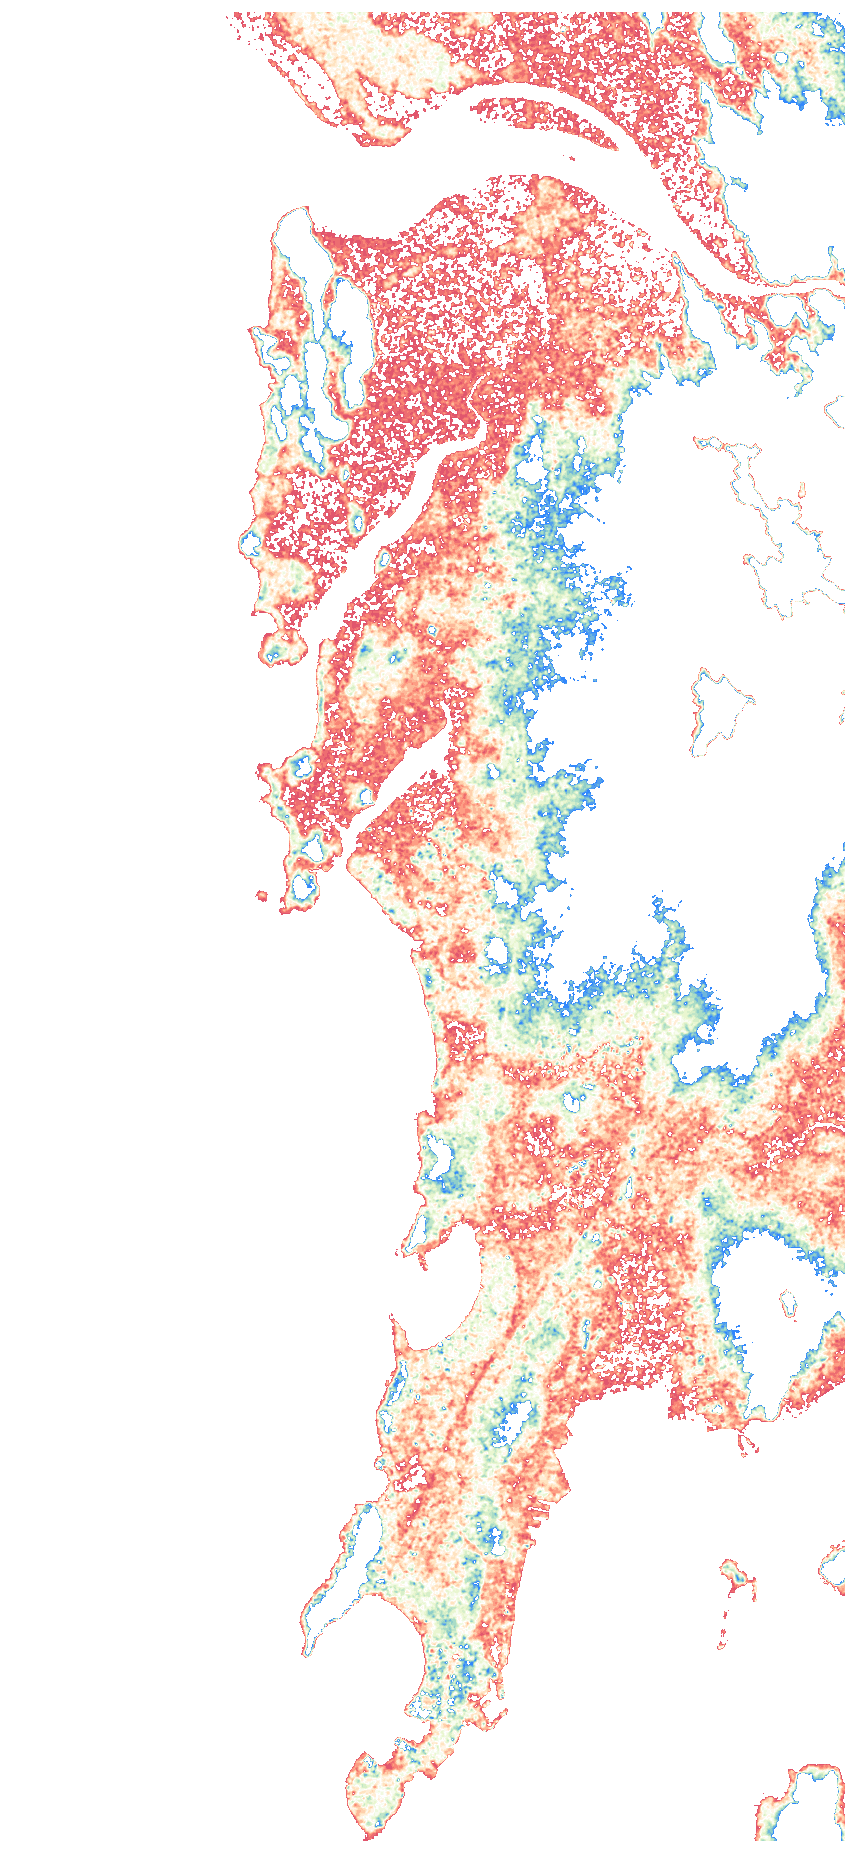

In [13]:
# For visualizing maps
Max_risk_elevation = 20

def create_fast_colormap_for_range(mycmmap_choice,vmin,vmax, empty_val):
    cm = mycmmap_choice.scale(vmin,vmax)   # cm.linear.Spectral_07.scale(0, 20)  # .to_step(1)
    cmArray = []
    for i in range(0,255, 1):
        if i> vmax or  i == empty_val:   # i>20 or i==0:
            cmArray.insert(i,(1, 0, 0, 0))
        else:
            cmArray.insert(i,colors.to_rgba(cm(i), 0.8))
    return cmArray

cmArray = create_fast_colormap_for_range(cm.linear.Spectral_07, 0,Max_risk_elevation, 0)

for NY_risk_file in result_rasterfiles_list:
    if NY_risk_file.endswith('.tiff'):
        with rasterio.open(NY_risk_file) as raster:
            # Display the boundaries of the raster image for a visual check
            rb = raster.bounds

            Map = folium.Map( max_bounds=True,
                    location=[(rb.bottom+rb.top)/2, (rb.left+rb.right)/2],   # [40.8768,-73.6195],
                    zoom_start=9,
                    min_lat=rb.bottom, # min_lat,
                    max_lat=rb.top,    # max_lat,
                    min_lon=rb.left,   # min_lon,
                    max_lon=rb.right   #max_lon
                    )
            Data = raster.read(1).astype(np.uint8)
            Data[Data >Max_risk_elevation] = 0   # set everything above 20 m  as  nodata and let be it 0

            folium.raster_layers.ImageOverlay(
                        image=Data,opacity=0.7,
                        colormap=lambda value: cmArray[value],
                        bounds=[[rb.bottom, rb.left], [rb.top, rb.right]]
                    ).add_to(Map)
            Map.add_child(cm.linear.Spectral_07.scale(0,Max_risk_elevation))
Map

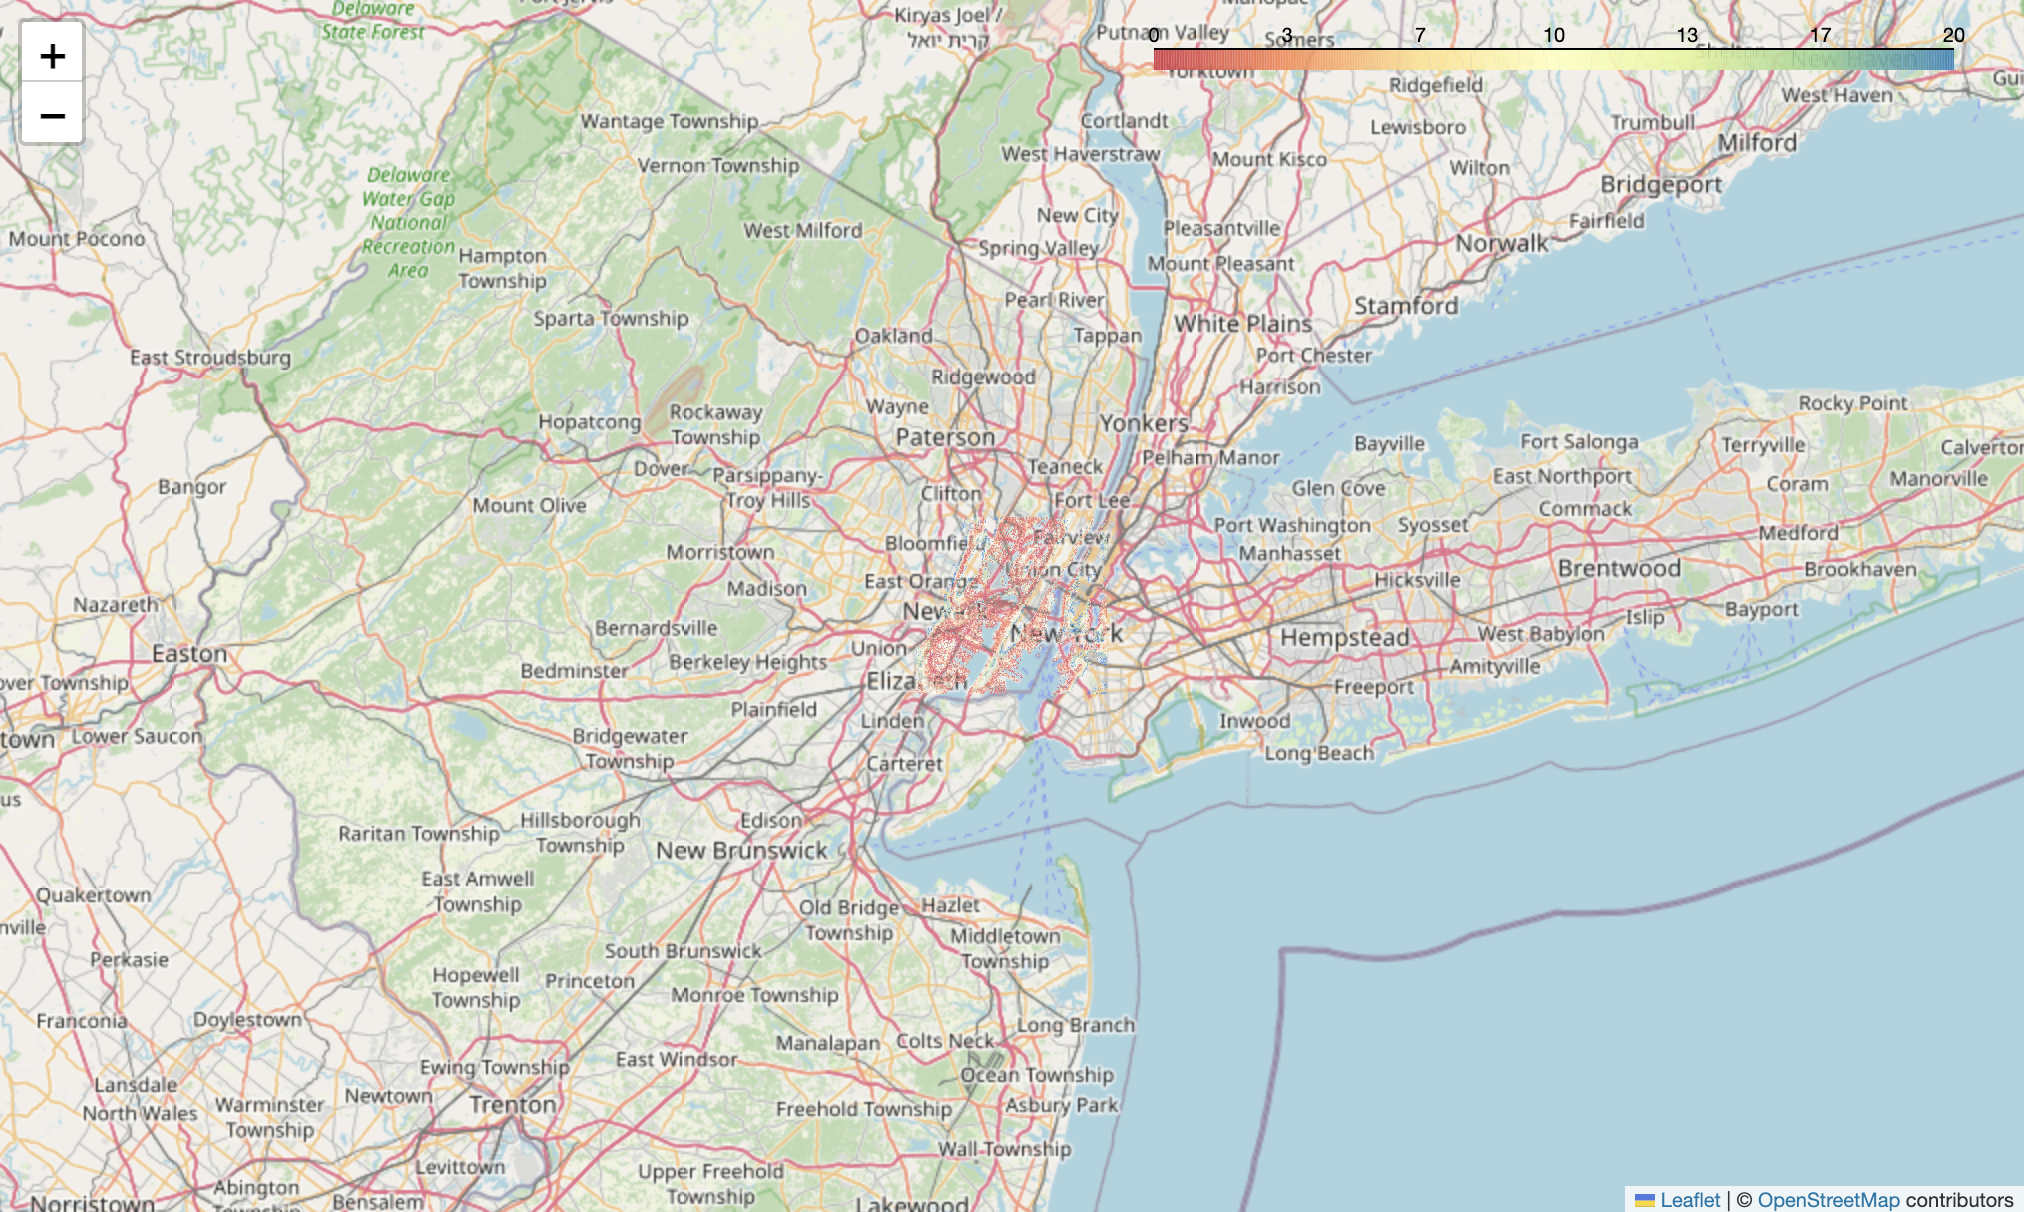

In [ ]:
display.Image('predict_sea_level_rise_risk.png')